# Medical Insurance Price Prediction 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
# Chargement et exploration du dataframe
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Forme 
df.shape

(2772, 7)

In [4]:
# Informations importantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
# Valeurs manquantes 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Nom des colonnes 
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# Statistiques descriptives 
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


### EDA

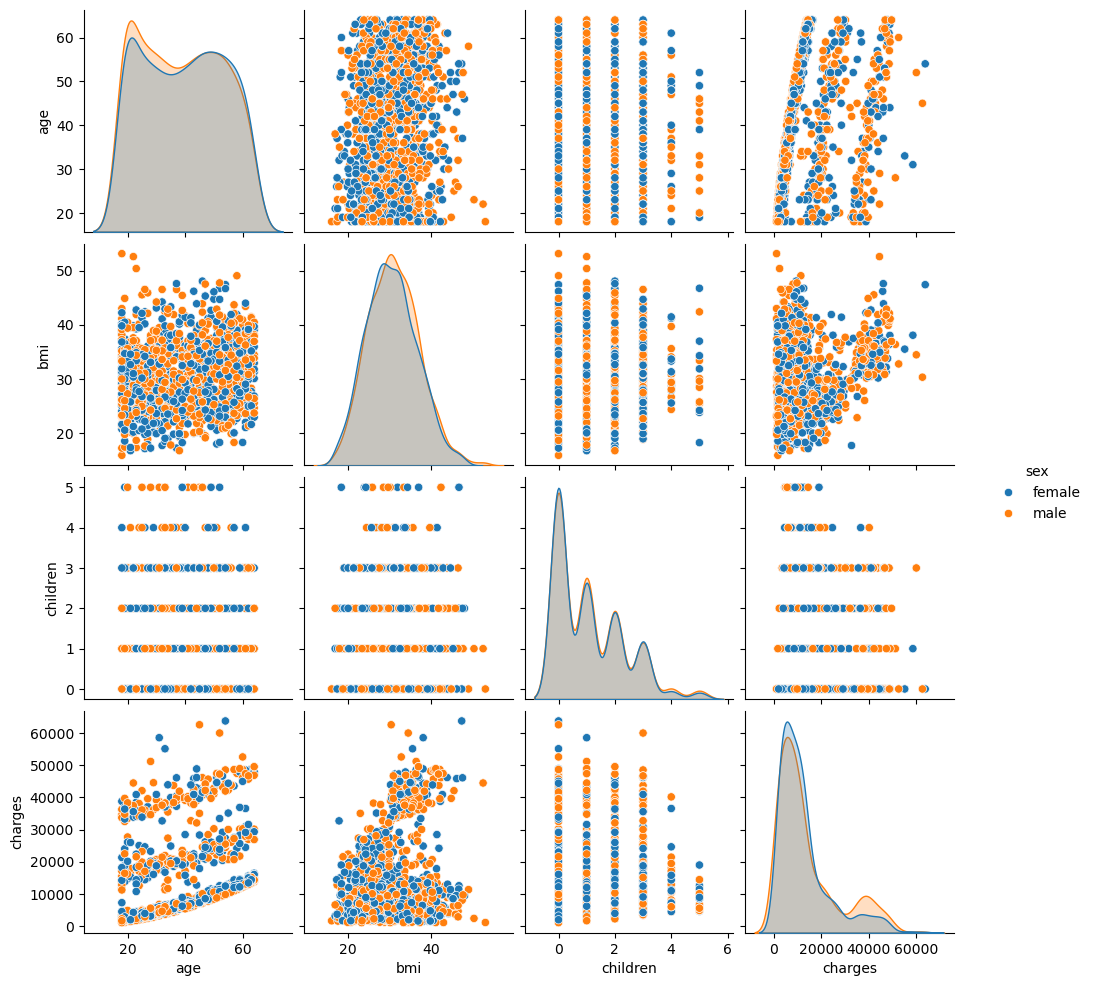

In [8]:
sns.pairplot(df, hue='sex')

<Axes: xlabel='age', ylabel='Count'>

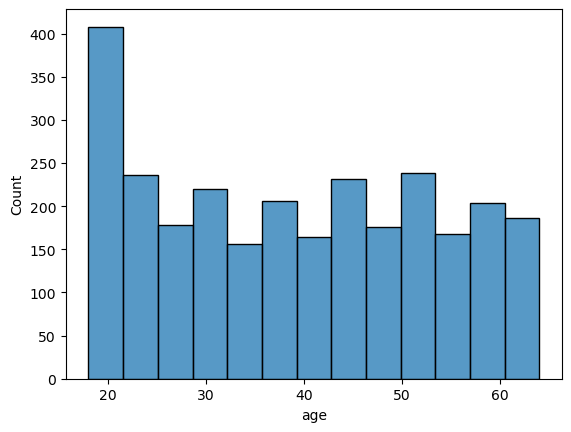

In [9]:
# Distributions des variables
sns.histplot(df['age'])

<Axes: xlabel='bmi', ylabel='Count'>

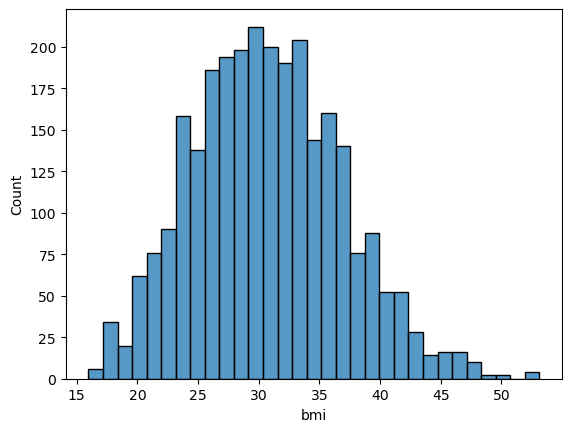

In [10]:
sns.histplot(df['bmi'])

<Axes: xlabel='children', ylabel='Count'>

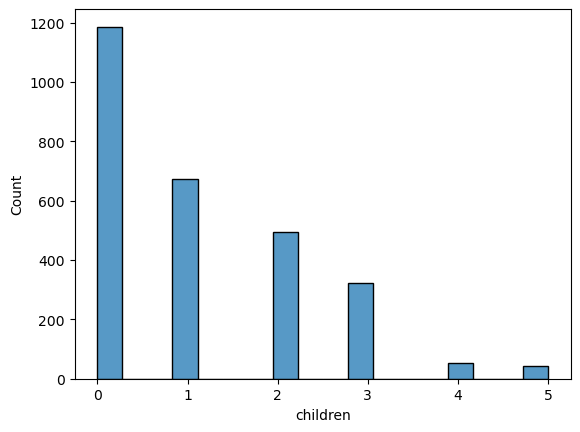

In [11]:
sns.histplot(df['children'])

<Axes: xlabel='charges', ylabel='Count'>

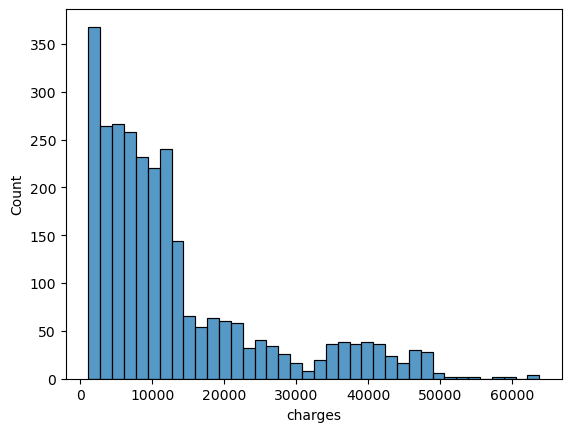

In [12]:
sns.histplot(df['charges'])

<Axes: xlabel='age', ylabel='charges'>

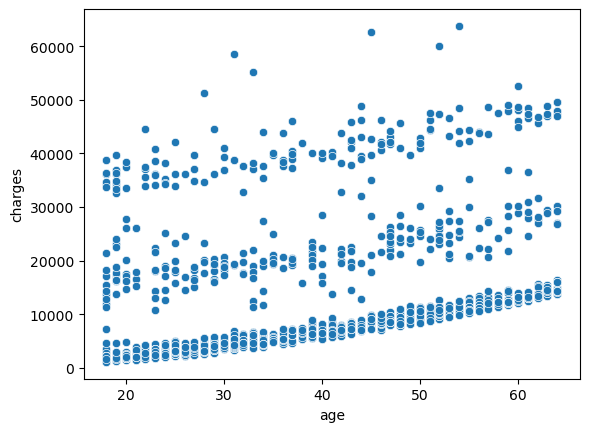

In [13]:
# Relations entre les variables et le prix 
sns.scatterplot(x = df['age'], y = df['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

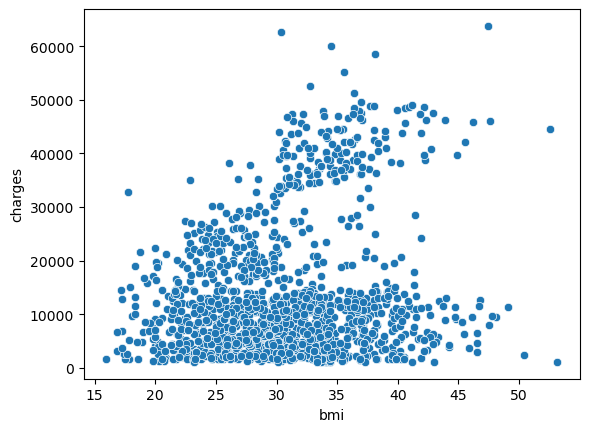

In [14]:
sns.scatterplot(x = df['bmi'], y= df['charges'])

<Axes: xlabel='children', ylabel='charges'>

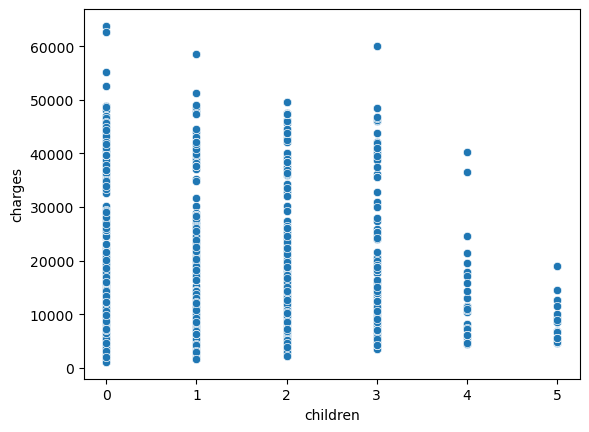

In [15]:
sns.scatterplot(x = df['children'], y = df['charges'])

<Axes: xlabel='sex', ylabel='charges'>

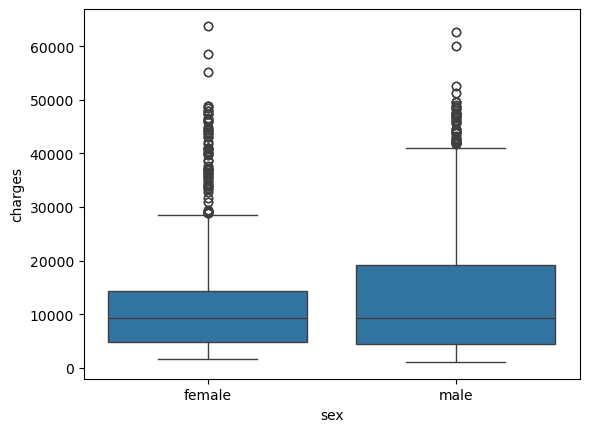

In [16]:
# BOXPLOT pour les variables continues 
sns.boxplot(x = df['sex'], y = df['charges'])

<Axes: xlabel='smoker', ylabel='charges'>

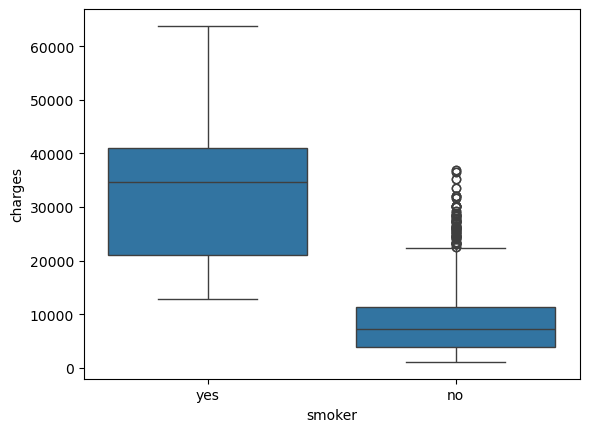

In [17]:
sns.boxplot(x = df['smoker'], y = df['charges'])

<Axes: xlabel='region', ylabel='charges'>

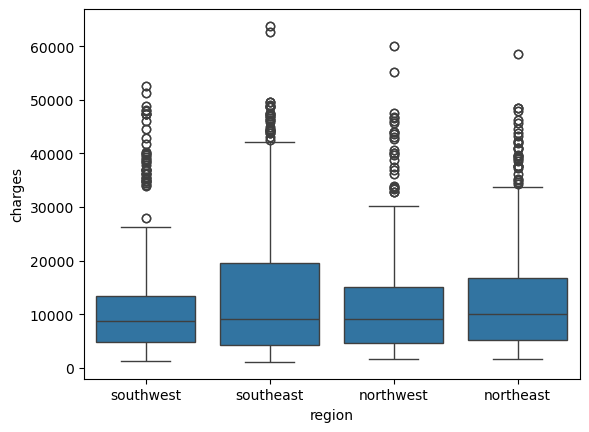

In [18]:
sns.boxplot(x = df['region'], y = df['charges'])

In [19]:
# Corrélations entre les variables numériques 
data_num = df[['age', 'bmi', 'children', 'charges']]
corr = data_num.corr()
corr

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


<Axes: >

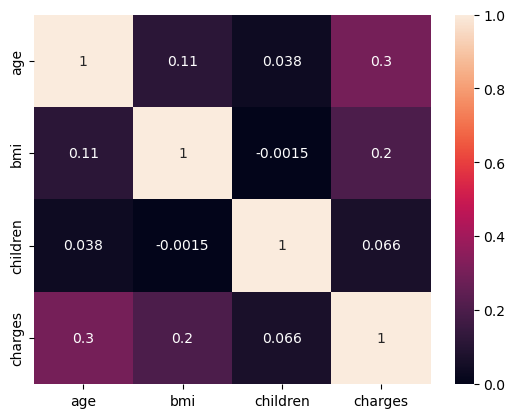

In [20]:
sns.heatmap(corr, annot=True)

### Prétraitement des données 

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
num_features = ['age', 'bmi', 'children']
cat_features = ['region', 'smoker', 'sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
lin_model = LinearRegression()
x = df.drop('charges', axis=1)
y = df['charges']
model_1 = Pipeline([
    ('preprocessor', preprocessor),
    ('lin_reg', lin_model)
])
model_2 = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=0.5))
])
model_3 = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=0.5))
])

In [23]:
# Regression linéaire
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model_1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['region', 'smoker',
                                                   'sex'])])),
                ('lin_reg', LinearRegression())])

In [24]:
model_1.score(x_train, y_train)

0.7536565270426124

In [25]:
# Evaluation poussée avec cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model_1, x_train, y_train, cv=5).mean()

np.float64(0.7505128472207582)

In [26]:
model_2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['region', 'smoker',
                                                   'sex'])])),
                ('ridge', Ridge(alpha=0.5))])

In [27]:
model_2.score(x_train, y_train)

0.7536560558033234

In [28]:
cross_val_score(model_2, x_train, y_train, cv=5).mean()

np.float64(0.7505165336414701)

In [29]:
model_3.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['region', 'smoker',
                                                   'sex'])])),
                ('lasso', Lasso(alpha=0.5))])

In [30]:
model_3.score(x_train, y_train)

0.753656460237289

In [31]:
cross_val_score(model_3, x_train, y_train, cv=5).mean()

np.float64(0.750519433673628)

In [32]:
# Trouver les meilleures hyperparamètres
param_grid_2 = { 
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}
param_grid_3 = { 
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_2 = GridSearchCV(model_2, param_grid= param_grid_2, cv=5)
grid_3 = GridSearchCV(model_3, param_grid = param_grid_3, cv=5)

In [34]:
grid_2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['region',
                                                                          'smoker',
                                                                          'sex'])])),
                                       ('ridge', Ridge(alpha=0.5))]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]})

In [35]:
grid_2.best_params_

{'ridge__alpha': 1}

In [36]:
grid_3.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         RobustScaler(),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['region',
                                                                          'smoker',
                                                                          'sex'])])),
                                       ('lasso', Lasso(alpha=0.5))]),
             param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100]})

In [37]:
grid_3.best_params_

{'lasso__alpha': 10}

In [38]:
# Evaluer le modèle 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

1. Linéaire

In [39]:
y_pred_lin = model_1.predict(x_test)
R_2_lin = round((r2_score(y_test, y_pred_lin)), 2)
RMSE_lin = round(np.sqrt(mean_squared_error(y_test, y_pred_lin)), 2)
MAE_lin = round(mean_absolute_error(y_test, y_pred_lin), 2)
print(f"R_2 = {R_2_lin}")
print(f"RMSE_lin = {RMSE_lin}")
print(f"MAE_lin = {MAE_lin}")

R_2 = 0.74
RMSE_lin = 6324.89
MAE_lin = 4224.77


2. Ridge

In [40]:
y_pred_ridge = grid_2.predict(x_test)
R_2_ridge= round((r2_score(y_test, y_pred_ridge)), 2)
RMSE_ridge = round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 2)
MAE_ridge = round(mean_absolute_error(y_test, y_pred_ridge), 2)
print(f"R_2 = {R_2_ridge}")
print(f"RMSE_lin = {RMSE_ridge}")
print(f"MAE_lin = {MAE_ridge}")

R_2 = 0.74
RMSE_lin = 6325.68
MAE_lin = 4227.15


3. Lasso

In [41]:
y_pred_lasso = grid_3.predict(x_test)
R_2_lasso= round((r2_score(y_test, y_pred_lasso)), 2)
RMSE_lasso = round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 2)
MAE_lasso = round(mean_absolute_error(y_test, y_pred_lasso), 2)
print(f"R_2 = {R_2_lasso}")
print(f"RMSE_lin = {RMSE_lasso}")
print(f"MAE_lin = {MAE_lasso}")

R_2 = 0.74
RMSE_lin = 6328.25
MAE_lin = 4226.41


### Meilleure modèle : Regression Linéaire

Avec le RMSE le plus faible 

In [42]:
# Extraction des coéficients du modèle
lin_model.coef_

array([  6182.89564402,   2684.31969574,   1017.54415424,    627.49104251,
          117.04193556,   -363.10736005,   -381.42561801, -11862.47401675,
        11862.47401675,     17.392935  ,    -17.392935  ])

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Text(0.5, 1.0, 'Prédictions vs valeurs réelles')

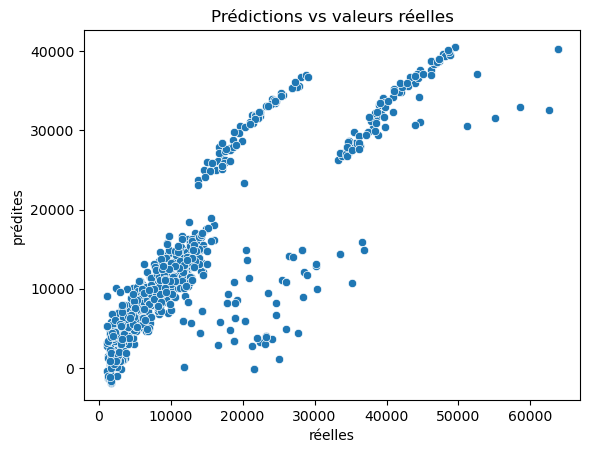

In [44]:
# Visualisation des prédictions 
sns.scatterplot(x = y_test, y = y_pred_lin)
plt.xlabel('réelles')
plt.ylabel('prédites')
plt.title('Prédictions vs valeurs réelles')